In [366]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp 

In [368]:
df = pd.read_csv("hypertension dataset.csv")

In [370]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [372]:
df.tail()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
1980,56,10.2,0,Normal,6.5,25.0,Diuretic,Yes,Low,Non-Smoker,Yes
1981,29,8.9,4,Hypertension,6.9,16.9,NaN,Yes,High,Non-Smoker,Yes
1982,64,5.9,9,Normal,5.6,18.9,ACE Inhibitor,Yes,Moderate,Non-Smoker,Yes
1983,35,7.4,8,Prehypertension,8.2,29.2,NaN,Yes,Moderate,Non-Smoker,No
1984,38,7.3,0,Normal,8.3,18.6,NaN,Yes,Low,Smoker,No


In [374]:
df.columns

Index(['Age', 'Salt_Intake', 'Stress_Score', 'BP_History', 'Sleep_Duration',
       'BMI', 'Medication', 'Family_History', 'Exercise_Level',
       'Smoking_Status', 'Has_Hypertension'],
      dtype='object')

In [376]:
print(f" The number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.") 

 The number of Rows are 1985, and columns are 11.


In [378]:
# Basic Information about the database 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [380]:
df.isnull().sum()

Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

Missing values are observed only in the Medication variable, while all other features contain no missing data.

In [413]:
# Identify numerical and categorical features 
numerical_features = ['Age', 'Salt_Intake', 'Stress_Score','Sleep_Duration', 'BMI']
categorical_features = ["BP_History", "Medication" , "Family_History", "Exercise_Level", "Smoking_Status","Has_Hypertension"]

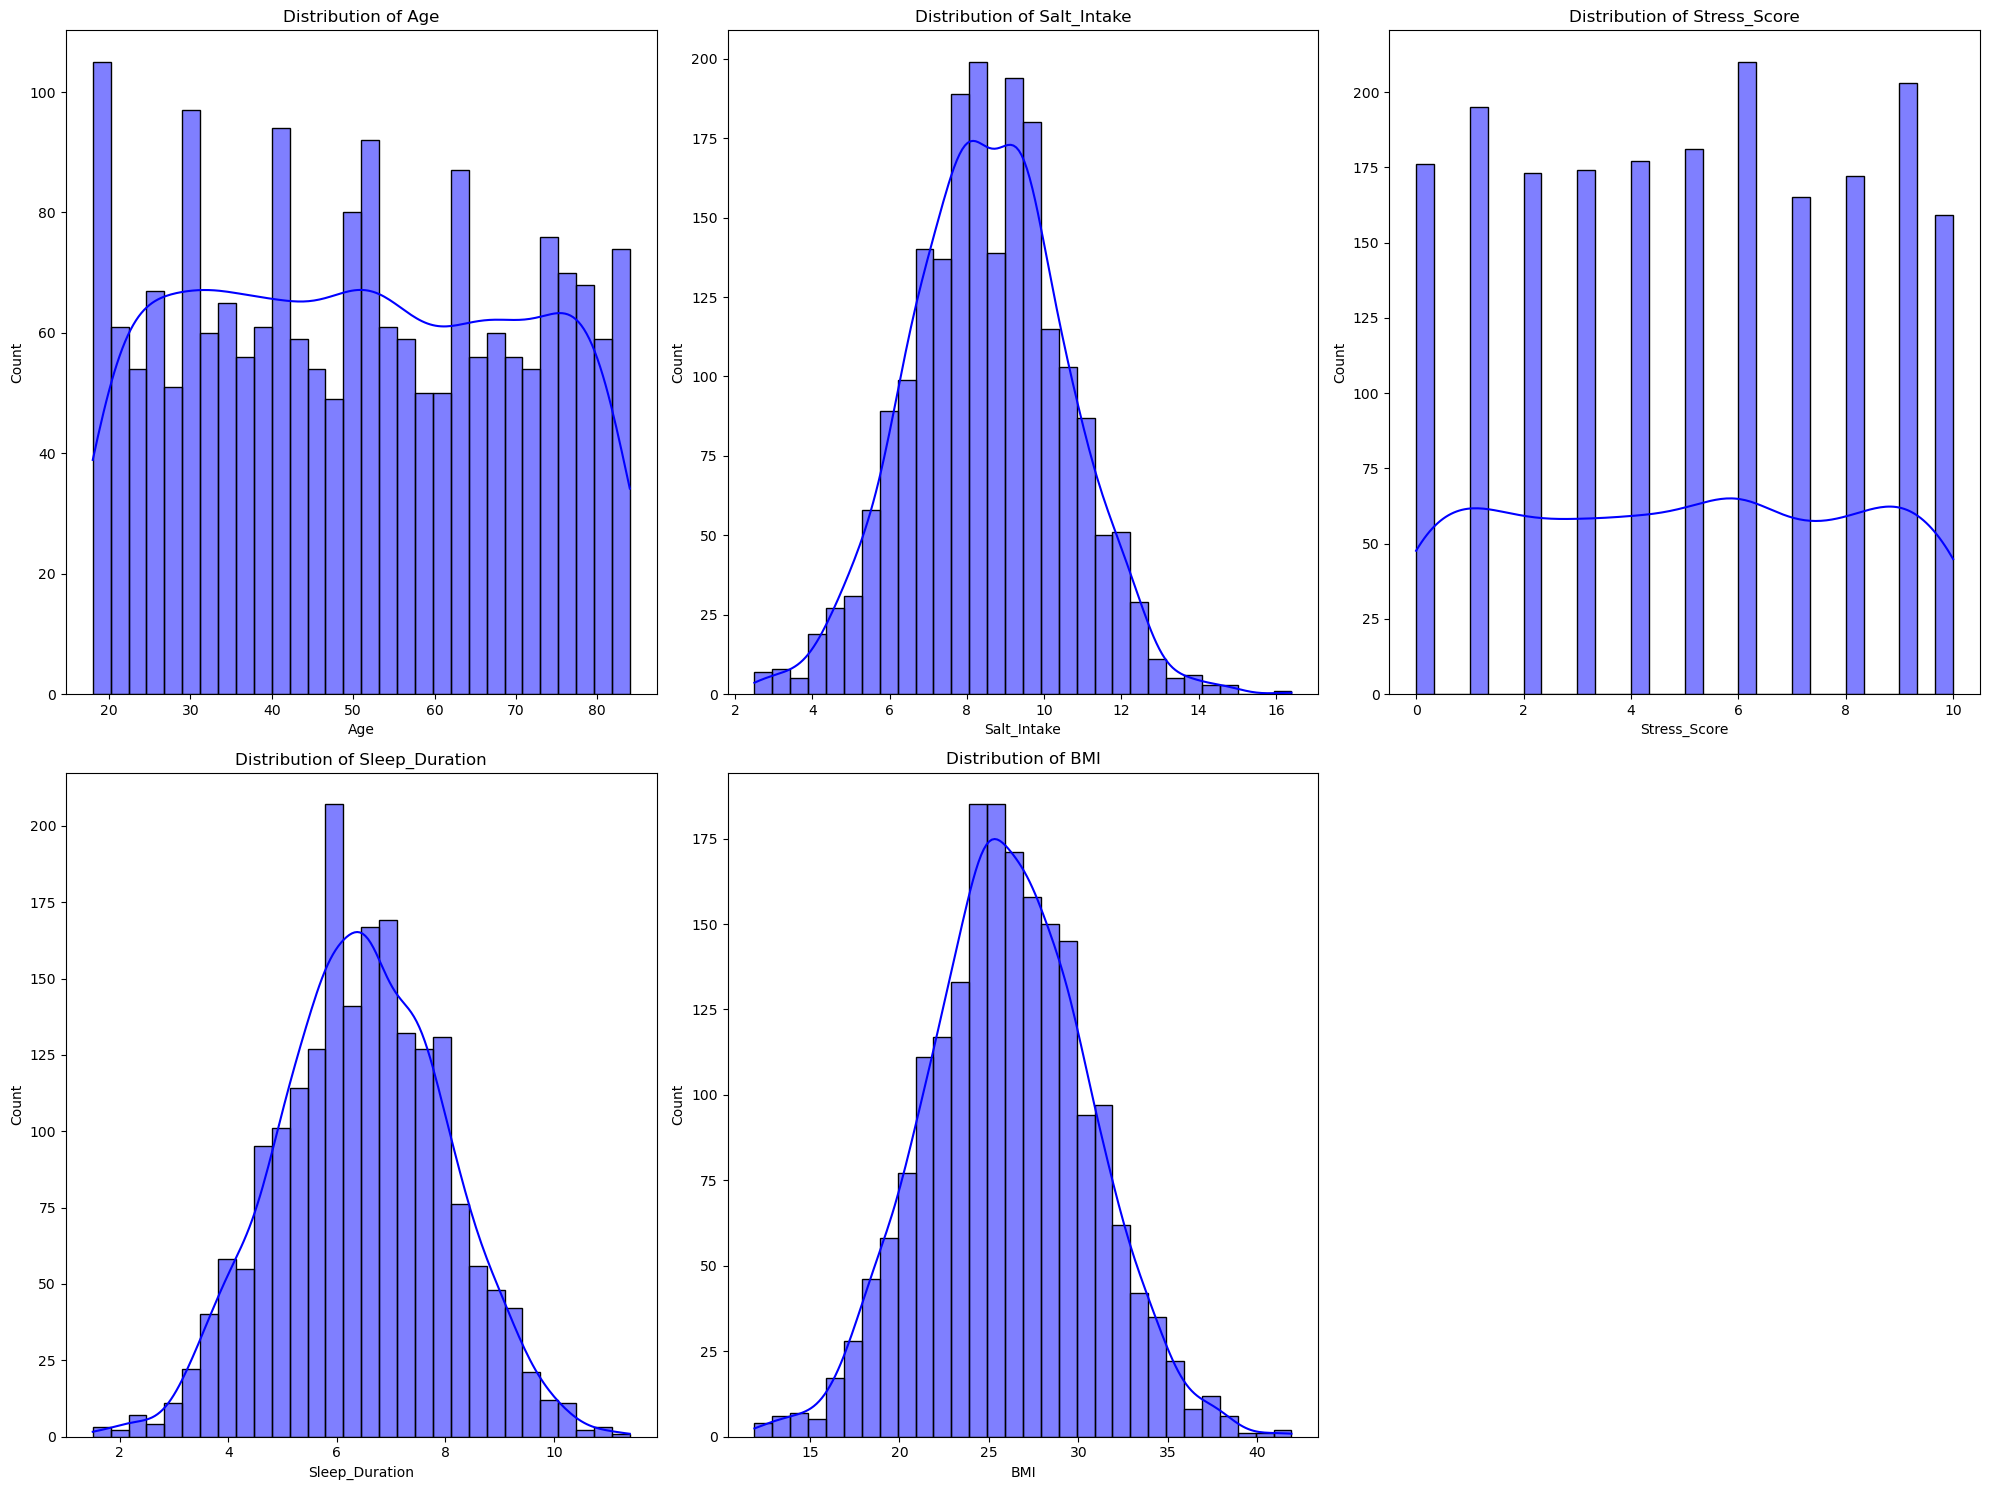

In [415]:
plt.figure(figsize=(20,15))

for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color="blue")
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Brief Analysis (based on the figure):

Age
The distribution is fairly uniform across adult and older age groups, with no strong skewness.

Salt Intake
Approximately normally distributed, centered around 8–9, with few extreme values.

Stress Score
Discrete values (0–10) with a relatively even distribution and no clear concentration.

Sleep Duration
Follows a normal distribution, centered at about 7 hours, with moderate variability.

BMI 
Roughly normally distributed, concentrated around 24–26, with limited extremes.


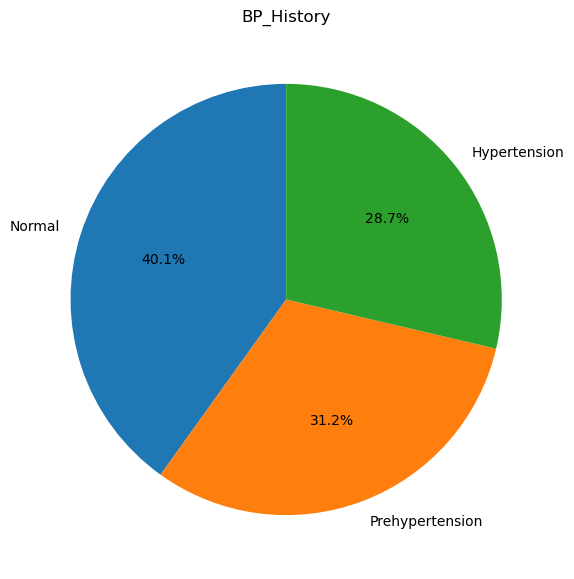

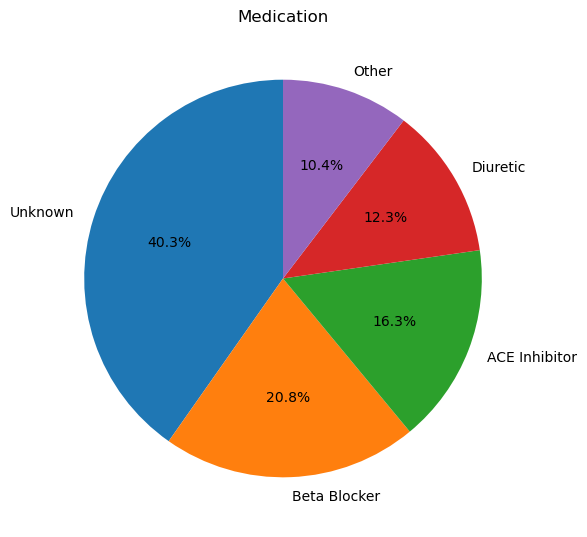

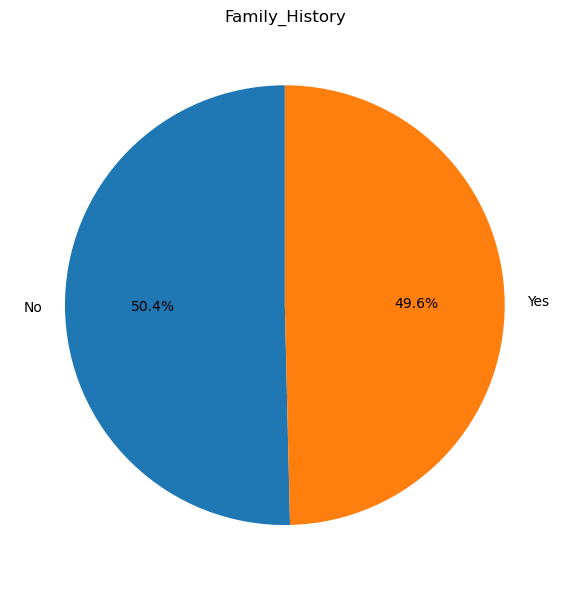

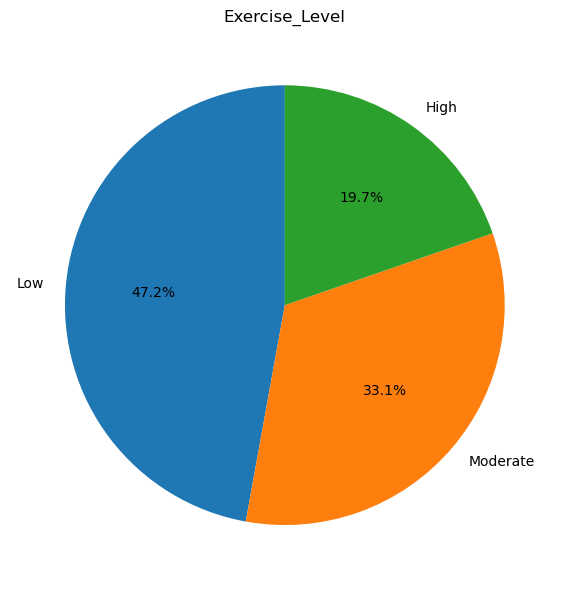

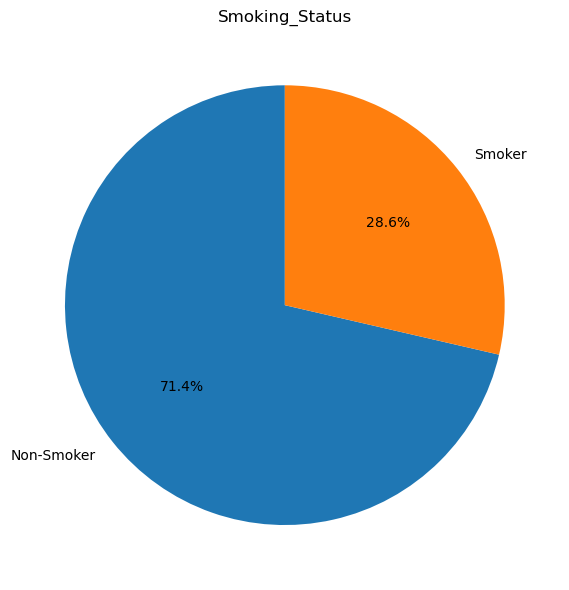

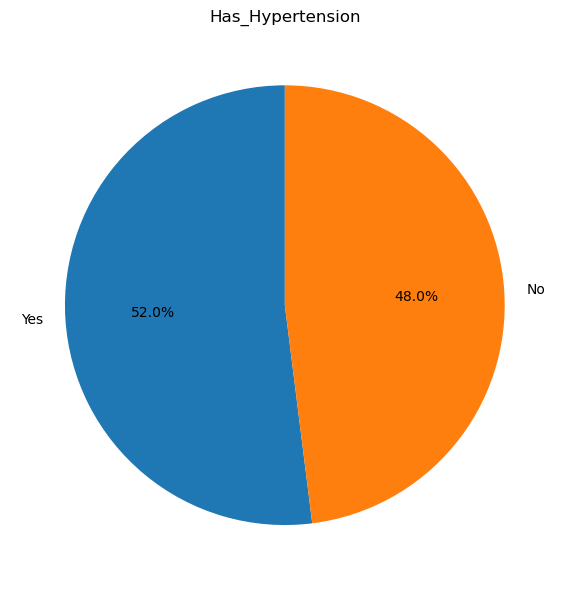

In [417]:
for col in categorical_features:
    counts = df[col].fillna("Unknown").value_counts()

    plt.figure(figsize=(6,6))
    plt.pie(
        counts.values,
        labels=counts.index.astype(str),
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(col)
    plt.tight_layout()
    plt.show()

BP_History

Most participants do not have normal blood pressure. Nearly 60% are either prehypertensive or hypertensive, indicating elevated cardiovascular risk in the dataset.

Medication

A large proportion of medication data is unknown (40.3%). Among known treatments, beta blockers are the most commonly reported medication.

Family_History

The distribution is almost evenly split between participants with and without a family history of hypertension, suggesting genetic factors may be relevant for many individuals.

Exercise_Level

Almost half of the participants report low physical activity, while fewer than 20% engage in high levels of exercise.

Smoking_Status

The majority of participants are non-smokers, although nearly one-third report being smokers.

Has_Hypertension

The prevalence of hypertension is high, with slightly more than half of the participants affected.


C:\Users\shuen\AppData\Local\Temp\ipykernel_5060\2835360173.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (data= df , x = "Has_Hypertension", y = "Age", palette = "Set2")


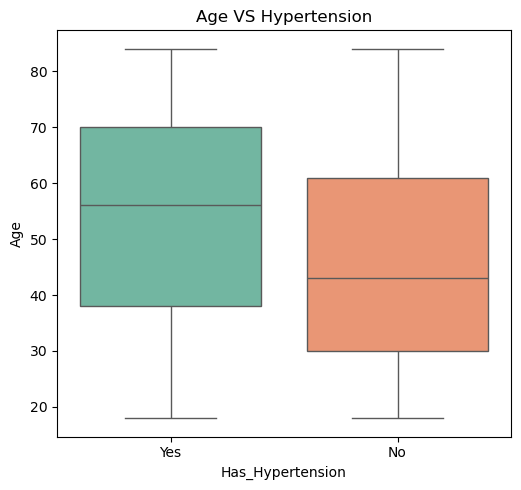

In [419]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot (data= df , x = "Has_Hypertension", y = "Age", palette = "Set2")
plt.title ("Age VS Hypertension")

plt.tight_layout()
plt.show()

The boxplot shows that participants with hypertension tend to be older than those without hypertension.

C:\Users\shuen\AppData\Local\Temp\ipykernel_5060\2771533589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (data= df , x = "Has_Hypertension", y = "Salt_Intake", palette = "Set2")


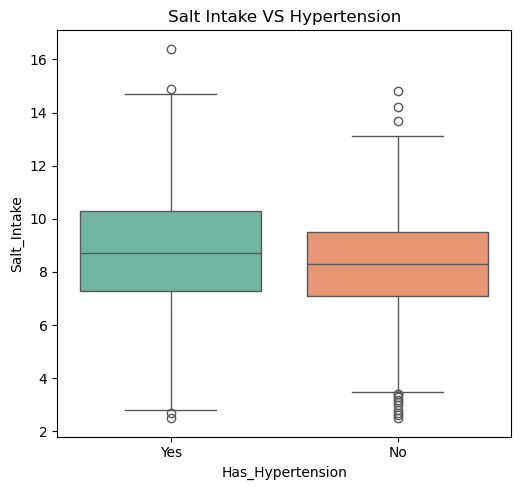

In [422]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot (data= df , x = "Has_Hypertension", y = "Salt_Intake", palette = "Set2")
plt.title ("Salt Intake VS Hypertension")

plt.tight_layout()
plt.show()

The median salt intake appears slightly higher among participants with hypertension compared to those without hypertension.

C:\Users\shuen\AppData\Local\Temp\ipykernel_5060\3251738689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (data = df , x = "Has_Hypertension" , y = "Stress_Score" , palette = "Set2")


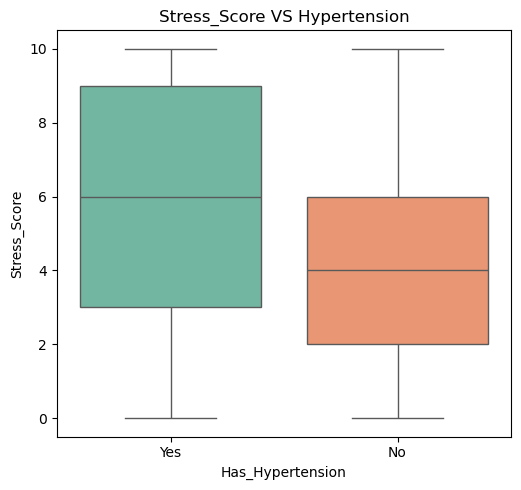

In [424]:
plt.figure(figsize = (10,5)) 
plt.subplot(1,2,1) 
sns.boxplot (data = df , x = "Has_Hypertension" , y = "Stress_Score" , palette = "Set2") 
plt.title ("Stress_Score VS Hypertension")  
plt.tight_layout()
plt.show()

Participants with hypertension tend to report higher stress scores comparedto those without hypertension.

C:\Users\shuen\AppData\Local\Temp\ipykernel_5060\1268050471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = "Has_Hypertension" , y = "Sleep_Duration", palette = "Set2")


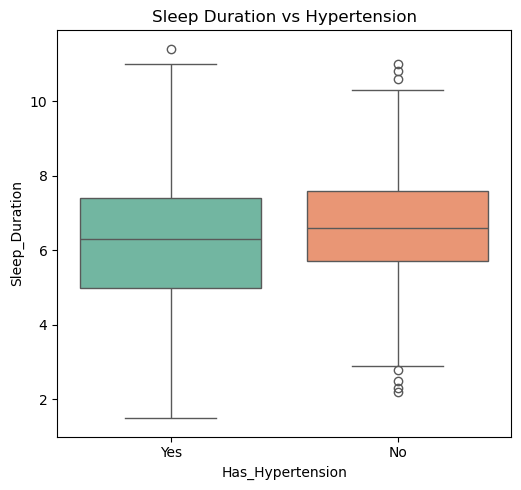

In [428]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, x = "Has_Hypertension" , y = "Sleep_Duration", palette = "Set2") 
plt.title("Sleep Duration vs Hypertension") 

plt.tight_layout()
plt.show()


In [430]:
Sleep duration appears slightly lower among participants with hypertension compared to those without hypertension.

SyntaxError: invalid syntax (1306208864.py, line 1)

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1) 
sns.boxplot(data=df, x = "Has_Hypertension", y= "BMI", palette = 'Set2')
plt.title("BMI vs Hypertension")

plt.tight_layout()
plt.show()

Participants with hypertension tend to have a higher median BMI compared to those without hypertension.

In [433]:
corr = df[numerical_features].corr()

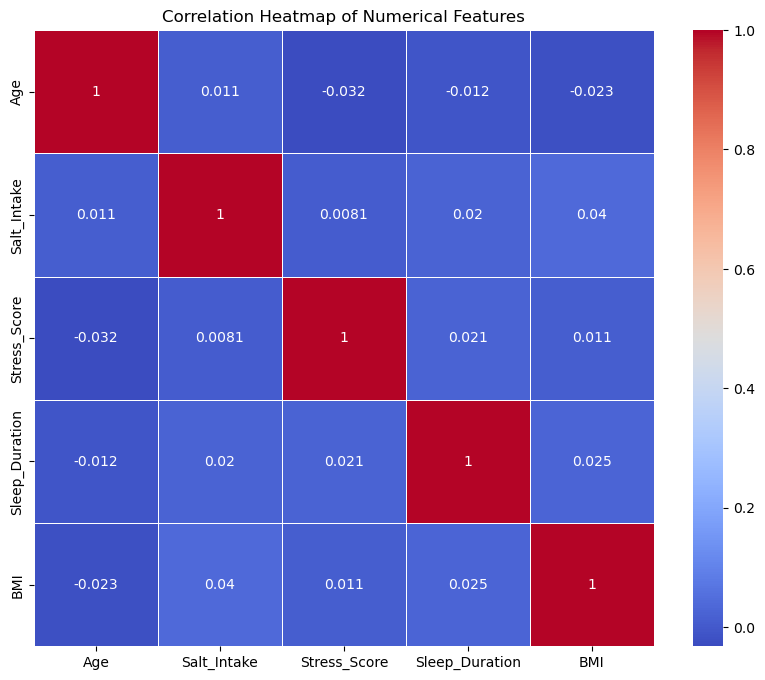

In [437]:
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True , cmap = 'coolwarm' , linewidth = 0.5) 
plt.title("Correlation Heatmap of Numerical Features") 
plt.show()

The correlation analysis indicates no strong linear relationships among the numerical variables.